In [2]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
from sklearn.preprocessing import Imputer
from sklearn.metrics import accuracy_score
import seaborn as sns

In [3]:
from scipy import stats
from sklearn import metrics
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt

C:\Users\TARUN AERVA TEJA\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
%matplotlib inline

In [5]:
data = pd.read_csv('adult (1).csv')

In [7]:
data = data.replace('?',np.NaN)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         30725 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        30718 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    31978 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
data.groupby('income').count()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
income,,,,,,,,,,,,,,
<=50K,24720,23075,24720,24720,24720,24720,23068,24720,24720,24720,24720,24720,24720,24283
>50K,7841,7650,7841,7841,7841,7841,7650,7841,7841,7841,7841,7841,7841,7695


In [10]:
data = data.replace('<=50K',0)
data = data.replace('>50K',1)

In [11]:
pd.crosstab(data.workclass,data.income)

income,0,1
workclass,,
Federal-gov,589,371
Local-gov,1476,617
Never-worked,7,0
Private,17733,4963
Self-emp-inc,494,622
Self-emp-not-inc,1817,724
State-gov,945,353
Without-pay,14,0


In [12]:
data.groupby('workclass').age.mean()

workclass
Federal-gov         42.590625
Local-gov           41.751075
Never-worked        20.571429
Private             36.797585
Self-emp-inc        46.017025
Self-emp-not-inc    44.969697
State-gov           39.436055
Without-pay         47.785714
Name: age, dtype: float64

In [13]:
pd.crosstab(data.workclass,data.education)

education,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
workclass,,,,,,,,,,,,,,,,
Federal-gov,6,9,5,0,1,2,3,55,38,212,16,263,67,0,29,254
Local-gov,31,36,19,4,9,28,23,88,86,477,27,503,342,4,29,387
Never-worked,2,1,0,0,0,1,0,0,0,0,0,1,0,0,0,2
Private,695,923,333,136,266,424,387,729,1005,3551,181,7780,894,41,257,5094
Self-emp-inc,19,14,7,2,4,14,10,35,38,273,35,279,79,0,81,226
Self-emp-not-inc,67,60,19,13,19,94,34,71,108,399,50,866,124,0,131,486
State-gov,13,14,10,1,4,10,6,41,46,270,89,268,169,1,31,325
Without-pay,0,0,0,0,0,1,0,1,0,0,0,9,0,0,0,3


In [14]:
median_fare = data.loc[(data.education == 'HS-grad') & (data.age >= 43)].workclass.mode()
print(median_fare)

0    Private
dtype: object


In [15]:
data.workclass.fillna(median_fare, inplace=True)

In [16]:
data[data.workclass.isnull()]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,0
14,51,NaN,172175,Doctorate,16,Never-married,NaN,Not-in-family,White,Male,0,2824,40,United-States,1
24,61,NaN,135285,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,2603,32,United-States,0
44,71,NaN,100820,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,2489,15,United-States,0
48,68,NaN,192052,Some-college,10,Married-civ-spouse,NaN,Wife,White,Female,0,2457,40,United-States,0
49,67,NaN,174995,Some-college,10,Married-civ-spouse,NaN,Husband,White,Male,0,2457,40,United-States,0
76,41,NaN,27187,Assoc-voc,11,Married-civ-spouse,NaN,Husband,White,Male,0,2415,12,United-States,1
114,72,NaN,118902,Doctorate,16,Married-civ-spouse,NaN,Husband,White,Male,0,2392,6,United-States,1
133,65,NaN,240857,Bachelors,13,Married-civ-spouse,NaN,Husband,White,Male,0,2377,40,United-States,1
136,68,NaN,257269,Bachelors,13,Married-civ-spouse,NaN,Husband,White,Male,0,2377,35,United-States,1


In [17]:
data.groupby('workclass').age.median()

workclass
Federal-gov         43
Local-gov           41
Never-worked        18
Private             35
Self-emp-inc        45
Self-emp-not-inc    44
State-gov           39
Without-pay         57
Name: age, dtype: int64

In [18]:
data.workclass.fillna('Private', inplace=True)

In [19]:
pd.crosstab(data.workclass,data.occupation)

occupation,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
workclass,,,,,,,,,,,,,,
Federal-gov,317,9,64,180,8,23,14,35,0,175,28,14,68,25
Local-gov,283,0,146,214,29,47,12,193,0,705,304,7,38,115
Private,2833,0,3195,2691,455,1273,1913,2740,149,2313,190,2942,736,1266
Self-emp-inc,31,0,106,400,51,2,13,27,0,160,5,291,3,27
Self-emp-not-inc,50,0,531,392,430,15,36,175,0,373,6,385,26,122
State-gov,253,0,56,189,15,9,13,124,0,414,116,11,57,41
Without-pay,3,0,1,0,6,1,1,1,0,0,0,0,0,1


In [20]:
data[data.occupation == 'NaN']

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income


In [21]:
data.groupby('occupation').age.median()

occupation
Adm-clerical         35
Armed-Forces         29
Craft-repair         38
Exec-managerial      41
Farming-fishing      39
Handlers-cleaners    29
Machine-op-inspct    36
Other-service        32
Priv-house-serv      40
Prof-specialty       40
Protective-serv      36
Sales                35
Tech-support         36
Transport-moving     39
Name: age, dtype: int64

In [22]:
data.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [23]:
data.groupby(['workclass','occupation']).age.mean()

workclass         occupation       
Federal-gov       Adm-clerical         42.605678
                  Armed-Forces         30.222222
                  Craft-repair         44.437500
                  Exec-managerial      44.177778
                  Farming-fishing      45.500000
                  Handlers-cleaners    38.217391
                  Machine-op-inspct    39.928571
                  Other-service        42.942857
                  Prof-specialty       42.228571
                  Protective-serv      39.142857
                  Sales                40.785714
                  Tech-support         41.264706
                  Transport-moving     45.800000
Local-gov         Adm-clerical         40.823322
                  Craft-repair         42.219178
                  Exec-managerial      47.121495
                  Farming-fishing      39.275862
                  Handlers-cleaners    37.361702
                  Machine-op-inspct    42.750000
                  Other-service  

In [24]:
data[data.occupation.isnull()]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,0
2,66,Private,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,0
14,51,Private,172175,Doctorate,16,Never-married,NaN,Not-in-family,White,Male,0,2824,40,United-States,1
24,61,Private,135285,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,2603,32,United-States,0
44,71,Private,100820,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,2489,15,United-States,0
48,68,Private,192052,Some-college,10,Married-civ-spouse,NaN,Wife,White,Female,0,2457,40,United-States,0
49,67,Private,174995,Some-college,10,Married-civ-spouse,NaN,Husband,White,Male,0,2457,40,United-States,0
76,41,Private,27187,Assoc-voc,11,Married-civ-spouse,NaN,Husband,White,Male,0,2415,12,United-States,1
114,72,Private,118902,Doctorate,16,Married-civ-spouse,NaN,Husband,White,Male,0,2392,6,United-States,1
133,65,Private,240857,Bachelors,13,Married-civ-spouse,NaN,Husband,White,Male,0,2377,40,United-States,1


In [25]:
data.groupby(['workclass','occupation']).age.mean()

workclass         occupation       
Federal-gov       Adm-clerical         42.605678
                  Armed-Forces         30.222222
                  Craft-repair         44.437500
                  Exec-managerial      44.177778
                  Farming-fishing      45.500000
                  Handlers-cleaners    38.217391
                  Machine-op-inspct    39.928571
                  Other-service        42.942857
                  Prof-specialty       42.228571
                  Protective-serv      39.142857
                  Sales                40.785714
                  Tech-support         41.264706
                  Transport-moving     45.800000
Local-gov         Adm-clerical         40.823322
                  Craft-repair         42.219178
                  Exec-managerial      47.121495
                  Farming-fishing      39.275862
                  Handlers-cleaners    37.361702
                  Machine-op-inspct    42.750000
                  Other-service  

In [26]:
median_fare2 = data.loc[(data.age >=17) & (data.age <= 50) & (data.workclass == 'Private')].occupation.mode()
print(median_fare2)

0    Craft-repair
dtype: object


In [27]:
median_fare3 = data.loc[(data.age >=50) & (data.age <=90 ) & (data.workclass == 'Private')].occupation.mode()
print(median_fare3)

0    Craft-repair
dtype: object


In [28]:
data.occupation.fillna(median_fare2, inplace=True)

In [29]:
data[data.occupation.isnull()]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
2,66,Private,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,0
14,51,Private,172175,Doctorate,16,Never-married,NaN,Not-in-family,White,Male,0,2824,40,United-States,1
24,61,Private,135285,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,2603,32,United-States,0
44,71,Private,100820,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,2489,15,United-States,0
48,68,Private,192052,Some-college,10,Married-civ-spouse,NaN,Wife,White,Female,0,2457,40,United-States,0
49,67,Private,174995,Some-college,10,Married-civ-spouse,NaN,Husband,White,Male,0,2457,40,United-States,0
76,41,Private,27187,Assoc-voc,11,Married-civ-spouse,NaN,Husband,White,Male,0,2415,12,United-States,1
114,72,Private,118902,Doctorate,16,Married-civ-spouse,NaN,Husband,White,Male,0,2392,6,United-States,1
133,65,Private,240857,Bachelors,13,Married-civ-spouse,NaN,Husband,White,Male,0,2377,40,United-States,1
136,68,Private,257269,Bachelors,13,Married-civ-spouse,NaN,Husband,White,Male,0,2377,35,United-States,1


In [30]:
data = data.dropna()

In [31]:
data.groupby('income').count()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
income,,,,,,,,,,,,,,
0,22655,22655,22655,22655,22655,22655,22655,22655,22655,22655,22655,22655,22655,22655
1,7508,7508,7508,7508,7508,7508,7508,7508,7508,7508,7508,7508,7508,7508


# Age

In [32]:
data.age.describe()

count    30163.000000
mean        38.439611
std         13.137802
min         17.000000
25%         28.000000
50%         37.000000
75%         47.000000
max         90.000000
Name: age, dtype: float64

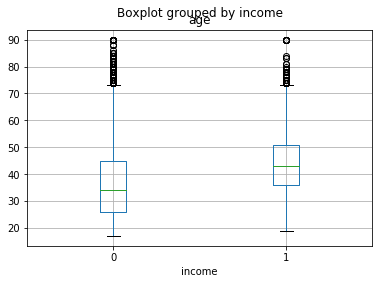

In [33]:
data[data.age.notnull()].boxplot('age','income');

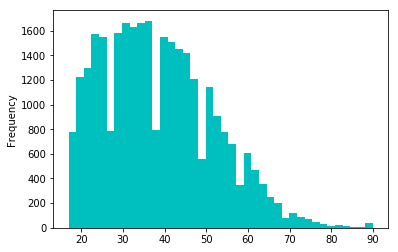

In [34]:
data.age.plot(kind='hist', bins=40, color='c');

In [35]:
print('Min age : {0}'.format(data.age.min())) # minimum
print('Max age : {0}'.format(data.age.max())) # maximum
print('age range : {0}'.format(data.age.max()  - data.age.min())) # range
print('25 percentile : {0}'.format(data.age.quantile(.25))) # 25 percentile
print('50 percentile : {0}'.format(data.age.quantile(.5))) # 50 percentile
print('75 percentile : {0}'.format(data.age.quantile(.75))) # 75 percentile
print('Variance age : {0}'.format(data.age.var())) # variance
print('Standard deviation age : {0}'.format(data.age.std())) # standard deviation

Min age : 17
Max age : 90
age range : 73
25 percentile : 28.0
50 percentile : 37.0
75 percentile : 47.0
Variance age : 172.6018417958517
Standard deviation age : 13.13780201540013


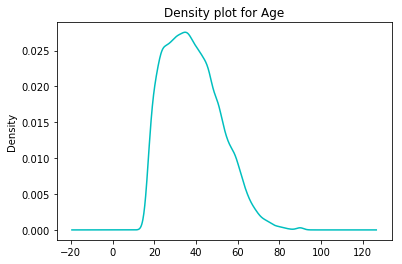

In [36]:
data.age.plot(kind='kde', title='Density plot for Age', color='c');

In [37]:
print('skewness for age : {0:.2f}'.format(data.age.skew()))

skewness for age : 0.53


In [38]:
Q1 = data.age.quantile(0.25)
Q3 = data.age.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

19.0


In [39]:
out = (data.age < (Q1 - 1.5 * IQR)) |(data.age > (Q3 + 1.5 * IQR))

In [40]:
out.value_counts()

False    29993
True       170
Name: age, dtype: int64

In [41]:
len(data.age)

30163

# Workclass

In [50]:
data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Craft-repair,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,0
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,0
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,1
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,0
10,45,Private,172274,Doctorate,16,Divorced,Prof-specialty,Unmarried,Black,Female,0,3004,35,United-States,1
11,38,Self-emp-not-inc,164526,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,0,2824,45,United-States,1


In [43]:
len(set(data.workclass))

7

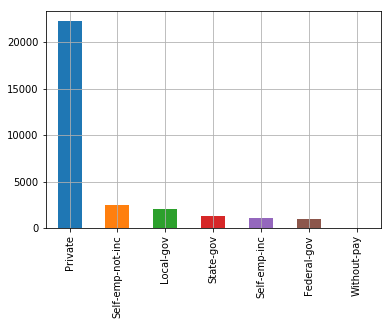

In [44]:
data.workclass.value_counts().plot(kind = 'bar',grid = True)

In [45]:
pd.crosstab(data.sex,data.workclass)

workclass,Federal-gov,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
sex,,,,,,,
Female,309,824,7643,126,392,484,5
Male,634,1243,14644,948,2107,795,9


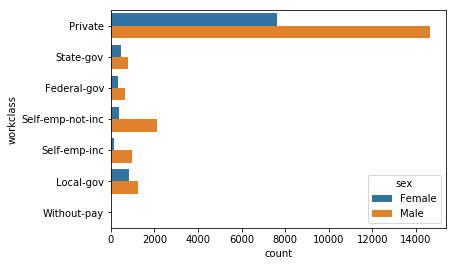

<Figure size 432x288 with 0 Axes>

In [47]:
sns.countplot(data=data,
              y="workclass",
              hue="sex")
#Similar to histogram
plt.show()
plt.clf()

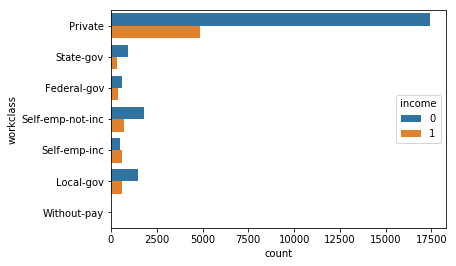

<Figure size 432x288 with 0 Axes>

In [48]:
sns.countplot(data=data,
              y="workclass",
              hue="income")
#Similar to histogram
plt.show()
plt.clf()

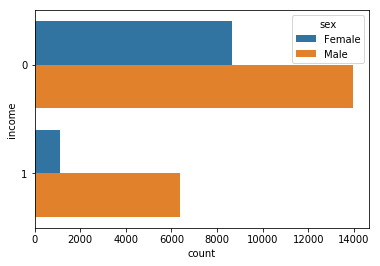

<Figure size 432x288 with 0 Axes>

In [49]:
sns.countplot(data=data,
              y="income",
              hue="sex")
#Similar to histogram
plt.show()
plt.clf()

In [51]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Craft-repair,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,0


In [149]:
data_new = data.drop(['fnlwgt','marital.status','relationship'],axis = 1)

In [150]:
data_new = data_new.drop('native.country',axis = 1)

In [151]:
data_new = data_new.drop('education',axis = 1)

In [152]:
data_new.head()

,age,workclass,education.num,occupation,race,sex,capital.gain,capital.loss,hours.per.week,income
0,90,Private,9,Craft-repair,White,Female,0,4356,40,0
1,82,Private,9,Exec-managerial,White,Female,0,4356,18,0
3,54,Private,4,Machine-op-inspct,White,Female,0,3900,40,0
4,41,Private,10,Prof-specialty,White,Female,0,3900,40,0
5,34,Private,9,Other-service,White,Female,0,3770,45,0


In [153]:
pd.crosstab(data_new.income,data_new.occupation)

occupation,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
income,,,,,,,,,,,,,,
0,3223,8,3123,2055,874,1267,1721,3080,142,2227,434,2614,634,1253
1,498,1,908,1937,115,83,245,132,1,1811,210,970,278,319


In [154]:
data_new.corr()

,age,education.num,capital.gain,capital.loss,hours.per.week,income
age,1.000000,0.043458,0.080115,0.061410,0.101563,0.241860
education.num,0.043458,1.000000,0.124418,0.079346,0.152523,0.335292
capital.gain,0.080115,0.124418,1.000000,-0.032221,0.080432,0.221198
capital.loss,0.061410,0.079346,-0.032221,1.000000,0.052293,0.149575
hours.per.week,0.101563,0.152523,0.080432,0.052293,1.000000,0.229480
income,0.241860,0.335292,0.221198,0.149575,0.229480,1.000000


In [155]:
data_new2 = data_new.drop('occupation',axis = 1)

In [158]:
set(data_new2.race)

{'Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'Black', 'Other', 'White'}

In [159]:
data_new2 = data_new2.replace('Amer-Indian-Eskimo',1)

In [160]:
data_new2 = data_new2.replace('Asian-Pac-Islander',2)

In [161]:
data_new2 = data_new2.replace('Black',3)

In [162]:
data_new2 = data_new2.replace('Other',4)

In [163]:
data_new2 = data_new2.replace('White',5)

In [164]:
set(data_new2.race)

{1, 2, 3, 4, 5}

In [165]:
set(data_new2.workclass)

{'Federal-gov',
 'Local-gov',
 'Private',
 'Self-emp-inc',
 'Self-emp-not-inc',
 'State-gov',
 'Without-pay'}

In [166]:
data_new2 = data_new2.replace('Female',1)
data_new2 = data_new2.replace('Male',2)
data_new2 = data_new2.replace('Federal-gov',1)
data_new2 = data_new2.replace('Local-gov',2)
data_new2 = data_new2.replace('Private',3)
data_new2 = data_new2.replace('Self-emp-inc',4)
data_new2 = data_new2.replace('Self-emp-not-inc',5)
data_new2 = data_new2.replace('State-gov',6)
data_new2 = data_new2.replace('Without-pay',7)



In [168]:
data_new2.dtypes

age               int64
workclass         int64
education.num     int64
race              int64
sex               int64
capital.gain      int64
capital.loss      int64
hours.per.week    int64
income            int64
dtype: object

In [169]:
data_new2=data_new2.rename(columns = {'education.num':'education_num'})

In [170]:
data_new2['workclass'] = data_new2.workclass.astype('category')

In [171]:
data_new2=data_new2.rename(columns = {'capital.gain':'gain','capital.loss':'loss','hours.per.week':'hours_per_week'})

In [173]:
data_new2['education_num'] = data_new2.education_num.astype('category')
data_new2['race'] = data_new2.race.astype('category')
data_new2['sex'] = data_new2.sex.astype('category')

In [175]:
data_new2['income'] = data_new2.income.astype('category')

In [176]:
data_new2.dtypes

age                  int64
workclass         category
education_num     category
race              category
sex               category
gain                 int64
loss                 int64
hours_per_week       int64
income            category
dtype: object

In [182]:
data_new2

,age,workclass,education_num,race,sex,gain,loss,hours_per_week,income
0,90,3,9,5,1,0,4356,40,0
1,82,3,9,5,1,0,4356,18,0
3,54,3,4,5,1,0,3900,40,0
4,41,3,10,5,1,0,3900,40,0
5,34,3,9,5,1,0,3770,45,0
6,38,3,6,5,2,0,3770,40,0
7,74,6,16,5,1,0,3683,20,1
8,68,1,9,5,1,0,3683,40,0
10,45,3,16,3,1,0,3004,35,1
11,38,5,15,5,2,0,2824,45,1


# Model designing for Classification

In [184]:
features = data_new2.iloc[:,0:8]

In [185]:
labels = data_new2.iloc[:,8]

In [188]:
features_z = features.apply(zscore)
features_z.head()

,age,workclass,education_num,race,sex,gain,loss,hours_per_week
0,3.924648,-0.208951,-0.439729,0.385041,-1.443331,-0.147442,10.536196,-0.077733
1,3.315708,-0.208951,-0.439729,0.385041,-1.443331,-0.147442,10.536196,-1.914190
3,1.184418,-0.208951,-2.400576,0.385041,-1.443331,-0.147442,9.410356,-0.077733
4,0.194890,-0.208951,-0.047560,0.385041,-1.443331,-0.147442,9.410356,-0.077733
5,-0.337932,-0.208951,-0.439729,0.385041,-1.443331,-0.147442,9.089393,0.339644


In [189]:
X_train, X_test, y_train, y_test = train_test_split (features_z, labels, test_size = 0.2, 
                                                     random_state = 0)

In [190]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((24130, 8), (6033, 8), (24130,), (6033,))

# Decision Tree

In [241]:
from sklearn.tree import DecisionTreeClassifier

DTClassifier = DecisionTreeClassifier (max_depth=10, min_samples_split = 3, random_state = 0)
# Your code here
# DTClassifier.fit (# Your code here, # Your code here)
#Hint: 
DTClassifier.fit (X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [242]:
predicted_labels1 = DTClassifier.predict(X_test)

In [243]:
score1 = accuracy_score(y_test, predicted_labels1)
print(score)

0.7982761478534726


In [228]:
DTClassifier_new = DecisionTreeClassifier (max_depth=10, criterion = "entropy",min_samples_leaf=5,random_state = 0)
DTClassifier_new.fit(X_train, y_train)
predicted_labels2 = DTClassifier_new.predict(X_test)
score2 = accuracy_score(y_test, predicted_labels2)
print(score2)

0.834410740924913


In [295]:
DTClassifier_new.fit(X_train, y_train)
predicted_labels2 = DTClassifier_new.predict(X_test)

print("1. Accuracy: ", str(metrics.accuracy_score(y_test,predicted_labels2) * 100) + "%")
print() 

precision = metrics.precision_score(y_test, predicted_labels2, average=None) * 100
print(precision)
print()
    
recall = metrics.recall_score(y_test, predicted_labels2, average=None) * 100
print(recall)
print()

print("4. Confusion Matrix: ")
print(metrics.confusion_matrix(y_test, predicted_labels2))

1. Accuracy:  83.44107409249129%

[84.03637771 79.88439306]

[96.14788576 45.58047493]

4. Confusion Matrix: 
[[4343  174]
 [ 825  691]]


In [296]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,predicted_labels2))  
print(classification_report(y_test,predicted_labels2))  
print(accuracy_score(y_test, predicted_labels2))  

[[4343  174]
 [ 825  691]]
             precision    recall  f1-score   support

          0       0.84      0.96      0.90      4517
          1       0.80      0.46      0.58      1516

avg / total       0.83      0.83      0.82      6033

0.834410740924913


In [265]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, predicted_labels2))
rms

0.4069266015820138

In [321]:
def plot_roc_curve(y_test, preds):
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

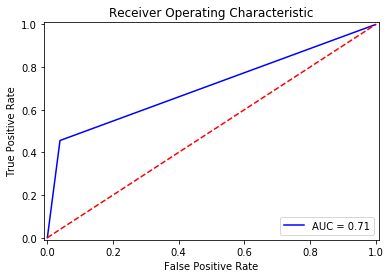

In [322]:
plot_roc_curve(y_test,predicted_labels2)

# K-Nearest Neighbor

In [266]:
from sklearn.neighbors import KNeighborsClassifier

In [267]:
NNH = KNeighborsClassifier(n_neighbors= 1 , weights = 'uniform', metric='chebyshev')

In [276]:
for i in range(1,30,2):
    NNH_all = KNeighborsClassifier(n_neighbors= i , weights = 'uniform', metric='euclidean')
    NNH_all.fit(X_train, y_train)
    predicted_labels_all = NNH_all.predict(X_test)
    score_all = accuracy_score(y_test, predicted_labels_all)
    print(i,score_all)

1 0.760981269683408
3 0.7952925575998674
5 0.8073926736283773
7 0.8126968340792309
9 0.8166749544173711
11 0.8161776893751036
13 0.8170064644455495
15 0.8209845847836897
17 0.8199900546991546
19 0.8198242996850654
21 0.8208188297696005
23 0.8211503397977788
25 0.8214818498259573
27 0.8196585446709763
29 0.8208188297696005


In [277]:
NNH = KNeighborsClassifier(n_neighbors= 25 , weights = 'uniform', metric='euclidean')
NNH.fit(X_train, y_train)
predicted_labels3 = NNH.predict(X_test)
score3 = accuracy_score(y_test, predicted_labels3)
print(25,score3)

25 0.8214818498259573


In [297]:
NNH.fit(X_train, y_train)
predicted_labels3 = NNH.predict(X_test)

print("1. Accuracy: ", str(metrics.accuracy_score(y_test,predicted_labels3) * 100) + "%")
print()

precision = metrics.precision_score(y_test, predicted_labels3, average=None) * 100
print(precision)
print()
    
recall = metrics.recall_score(y_test, predicted_labels3, average=None) * 100
print(recall)
print()

print("4. Confusion Matrix: ")
print(metrics.confusion_matrix(y_test, predicted_labels3))

1. Accuracy:  82.14818498259572%

[84.05940594 72.32960326]

[93.97830418 46.89973615]

4. Confusion Matrix: 
[[4245  272]
 [ 805  711]]


In [298]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,predicted_labels3))  
print(classification_report(y_test,predicted_labels3))  
print(accuracy_score(y_test, predicted_labels3))  

[[4245  272]
 [ 805  711]]
             precision    recall  f1-score   support

          0       0.84      0.94      0.89      4517
          1       0.72      0.47      0.57      1516

avg / total       0.81      0.82      0.81      6033

0.8214818498259573


In [299]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms2 = sqrt(mean_squared_error(y_test, predicted_labels3))
rms2

0.4225140828114996

In [319]:
def plot_roc_curve(y_test, preds):
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

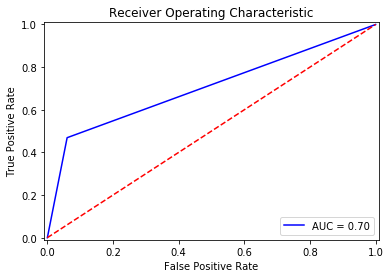

In [320]:
plot_roc_curve(y_test,predicted_labels3)

# Random Forest

RandomForestClassifier(n_estimators=’warn’, criterion=’gini’, max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None)

In [289]:
from sklearn.ensemble import RandomForestClassifier

In [309]:
for i in range(1,30):
    RF_all = RandomForestClassifier(n_estimators=i, random_state=0, criterion='entropy',max_depth=10)  
    RF_all.fit(X_train, y_train)  
    predicted_labels_all2 = RF_all.predict(X_test)
    score_all2 = accuracy_score(y_test, predicted_labels_all2)
    print(i,score_all2)

1 0.8236366650091165
2 0.8299353555445053
3 0.8329189457981104
4 0.8337477208685563
5 0.8359025360517156
6 0.8370628211503398
7 0.8365655561080723
8 0.8360682910658047
9 0.8373943311785181
10 0.8359025360517156
11 0.8365655561080723
12 0.8359025360517156
13 0.8355710260235372
14 0.8367313111221615
15 0.8352395159953588
16 0.8365655561080723
17 0.8362340460798939
18 0.8357367810376264
19 0.8357367810376264
20 0.836399801093983
21 0.8357367810376264
22 0.8357367810376264
23 0.8349080059671805
24 0.8357367810376264
25 0.8357367810376264
26 0.836399801093983
27 0.837228576164429
28 0.8357367810376264
29 0.8360682910658047


In [314]:
RF = RandomForestClassifier(n_estimators=9, random_state=0, criterion='entropy',max_depth=10)  
RF.fit(X_train, y_train)  
predicted_labels4 = RF.predict(X_test)
score4 = accuracy_score(y_test, predicted_labels4)
print(9,score4)

9 0.8373943311785181


In [315]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,predicted_labels4))  
print(classification_report(y_test,predicted_labels4))  
print(accuracy_score(y_test, predicted_labels4))  

[[4345  172]
 [ 809  707]]
             precision    recall  f1-score   support

          0       0.84      0.96      0.90      4517
          1       0.80      0.47      0.59      1516

avg / total       0.83      0.84      0.82      6033

0.8373943311785181


In [316]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms3 = sqrt(mean_squared_error(y_test, predicted_labels4))
rms3

0.4032439321570529

In [317]:
# calculate the fpr and tpr for all thresholds of the classification
def plot_roc_curve(y_test, preds):
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

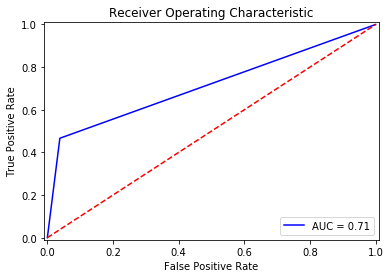

In [318]:
plot_roc_curve(y_test,predicted_labels4)

# Naive Bayes

In [323]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [334]:
GNB = GaussianNB()
GNB.fit(X_train, y_train)

GaussianNB(priors=None)

In [335]:
expected = y_test
predicted = GNB.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

             precision    recall  f1-score   support

          0       0.80      0.95      0.87      4517
          1       0.67      0.30      0.42      1516

avg / total       0.77      0.79      0.76      6033

[[4292  225]
 [1056  460]]


In [336]:
prob_class = model.class_prior_
print("Probability of each class: ")
print(prob_class)
print()

Probability of each class: 
[0.75167841 0.24832159]



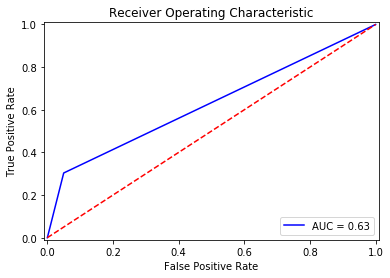

In [337]:
plot_roc_curve(y_test,predicted)

In [338]:
from sklearn.externals import joblib

joblib.dump(NNH, 'kNN.model')
joblib.dump(GNB, 'GNB.model')
joblib.dump(DTClassifier_new, 'DT.model')

['DT.model']

In [339]:
NNHlearn = joblib.load('kNN.model')
GNBlearn = joblib.load('GNB.model')
DTClassifier_newlearn = joblib.load('DT.model')

In [340]:
features_z

,age,workclass,education_num,race,sex,gain,loss,hours_per_week
0,3.924648,-0.208951,-0.439729,0.385041,-1.443331,-0.147442,10.536196,-0.077733
1,3.315708,-0.208951,-0.439729,0.385041,-1.443331,-0.147442,10.536196,-1.914190
3,1.184418,-0.208951,-2.400576,0.385041,-1.443331,-0.147442,9.410356,-0.077733
4,0.194890,-0.208951,-0.047560,0.385041,-1.443331,-0.147442,9.410356,-0.077733
5,-0.337932,-0.208951,-0.439729,0.385041,-1.443331,-0.147442,9.089393,0.339644
6,-0.033462,-0.208951,-1.616238,0.385041,0.692842,-0.147442,9.089393,-0.077733
7,2.706768,2.936054,2.305456,0.385041,-1.443331,-0.147442,8.874595,-1.747239
8,2.250063,-2.305621,-0.439729,0.385041,-1.443331,-0.147442,8.874595,-0.077733
10,0.499360,-0.208951,2.305456,-2.011076,-1.443331,-0.147442,7.198180,-0.495109
11,-0.033462,1.887719,1.913287,0.385041,0.692842,-0.147442,6.753769,0.339644


In [359]:
labels

0        0
1        0
3        0
4        0
5        0
6        0
7        1
8        0
10       1
11       1
12       1
13       1
15       1
16       1
17       1
19       1
20       1
21       0
22       0
23       0
25       0
26       0
27       0
28       1
29       1
30       1
31       1
32       1
33       1
34       1
        ..
32525    0
32526    0
32527    0
32529    0
32530    0
32531    0
32532    0
32535    1
32536    1
32537    0
32538    0
32539    1
32540    0
32542    0
32545    0
32546    0
32547    1
32548    0
32549    0
32550    0
32551    0
32552    0
32553    0
32554    0
32555    1
32556    0
32557    0
32558    1
32559    0
32560    0
Name: income, Length: 30163, dtype: category
Categories (2, int64): [0, 1]

In [360]:
newInstance = [2.706768,2.936054,2.305456,0.385041,-1.443331,-0.147442,8.874595,-1.747239]
newInstance  = np.array([newInstance ])
                
print("New Instance: ")
for i in range(8):
    print(features_z.columns[i] + ":", newInstance[0][i])

New Instance: 
age: 2.706768
workclass: 2.936054
education_num: 2.305456
race: 0.385041
sex: -1.443331
gain: -0.147442
loss: 8.874595
hours_per_week: -1.747239


In [349]:
labels

0        0
1        0
3        0
4        0
5        0
6        0
7        1
8        0
10       1
11       1
12       1
13       1
15       1
16       1
17       1
19       1
20       1
21       0
22       0
23       0
25       0
26       0
27       0
28       1
29       1
30       1
31       1
32       1
33       1
34       1
        ..
32525    0
32526    0
32527    0
32529    0
32530    0
32531    0
32532    0
32535    1
32536    1
32537    0
32538    0
32539    1
32540    0
32542    0
32545    0
32546    0
32547    1
32548    0
32549    0
32550    0
32551    0
32552    0
32553    0
32554    0
32555    1
32556    0
32557    0
32558    1
32559    0
32560    0
Name: income, Length: 30163, dtype: category
Categories (2, int64): [0, 1]

In [365]:
print(labels[GNBlearn.predict(newInstance)][0])

0


In [364]:
print(labels[DTClassifier_newlearn.predict(newInstance)][0])

0


In [366]:
print(labels[NNHlearn.predict(newInstance)])

1    0
Name: income, dtype: category
Categories (2, int64): [0, 1]
